# House Prices - Advanced Regression Techniques


Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale





# Loading The Necessary Dependencies

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge

# Loading The Datasets

In [13]:
train_data = pd.read_csv('/content/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
test_data = pd.read_csv('/content/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Checking the shape of training and testing dataset

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
test_data.shape

(1459, 80)

In [17]:
train_data.shape

(1460, 81)

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Checking For Numeric values Only

In [20]:
train_data.dtypes[train_data.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

# Building Scatter Plot

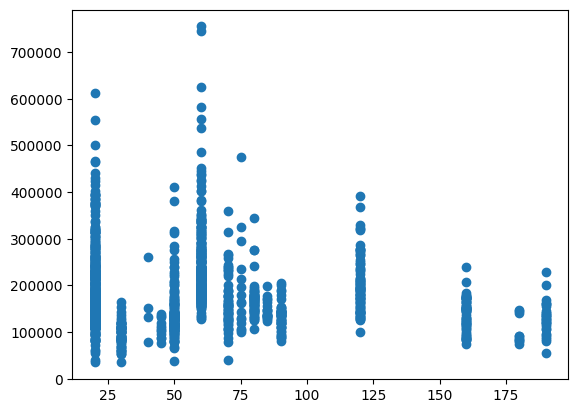

In [21]:
plt.scatter(x='MSSubClass',y='SalePrice' ,data=train_data)

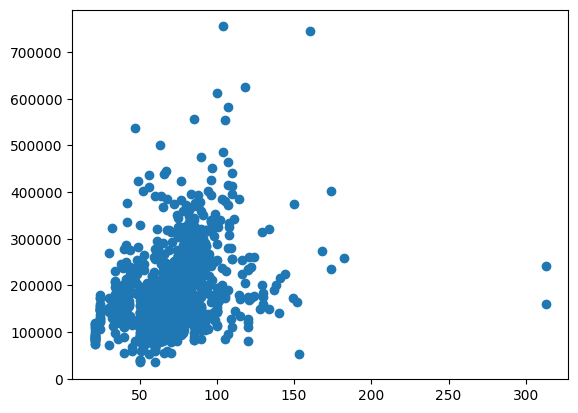

In [22]:
plt.scatter(x='LotFrontage',y='SalePrice' ,data=train_data)

In [23]:
train_data.query('LotFrontage > 300') #Outlier Checking(#935 and #1299)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


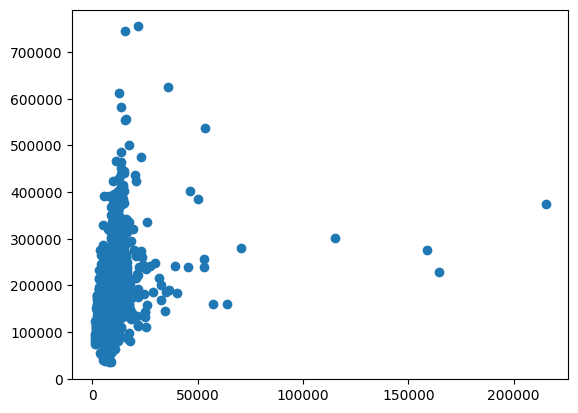

In [24]:
plt.scatter(x='LotArea',y='SalePrice' ,data=train_data)

In [25]:
train_data.query('LotArea > 55000') #Outlier Checking(#250, #314, #336,#452,#707,#1397may be)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [26]:
stats.zscore(train_data['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

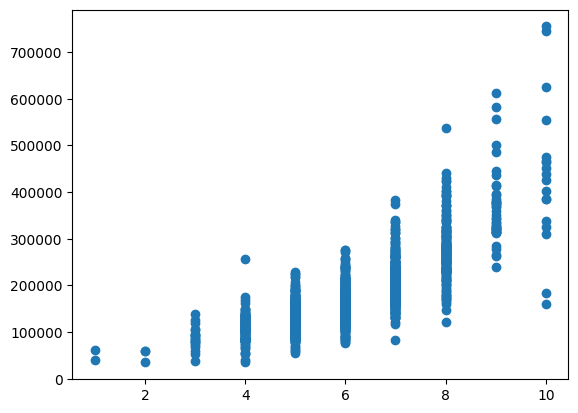

In [27]:
plt.scatter(x='OverallQual',y='SalePrice' ,data=train_data)

In [28]:
train_data.query('OverallQual == 10')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


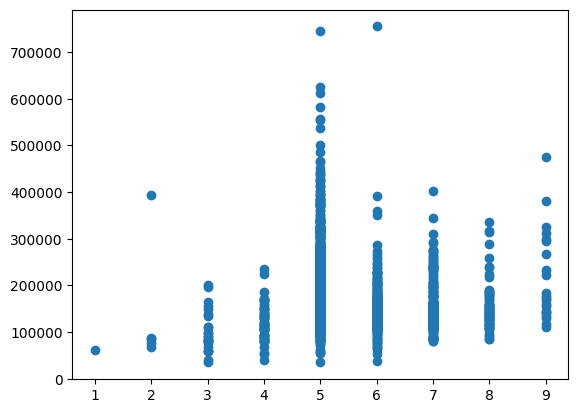

In [29]:
plt.scatter(x='OverallCond',y='SalePrice' ,data=train_data)

In [30]:
train_data.query('OverallCond == 2') #379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [31]:
train_data.query('OverallCond == 5 & SalePrice > 70000') #1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000


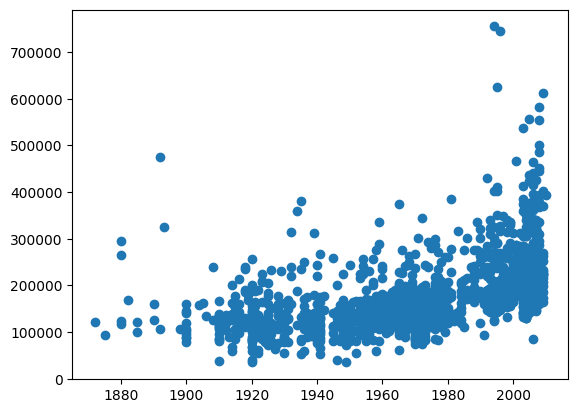

In [32]:
plt.scatter(x='YearBuilt',y='SalePrice' ,data=train_data)

In [33]:
train_data.query('YearBuilt < 1900 & SalePrice > 40000') #186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
106,107,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,450,8,2007,WD,Normal,100000
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
630,631,70,RM,50.0,9000,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Abnorml,124000
716,717,70,RM,60.0,10800,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,159500
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000
945,946,50,RM,98.0,8820,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,9,2009,WD,Normal,124900
991,992,70,RM,121.0,17671,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,168000


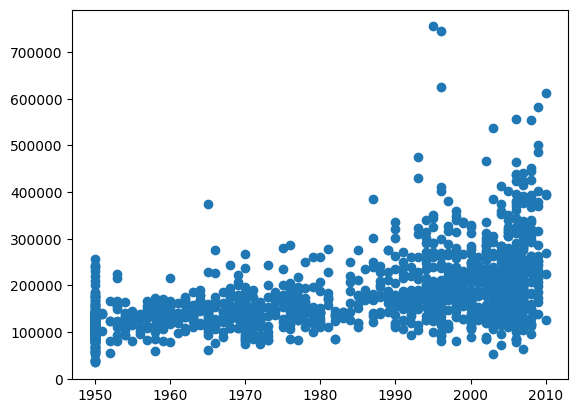

In [34]:
plt.scatter(x='YearRemodAdd',y='SalePrice' ,data=train_data)

In [35]:
train_data.query('YearRemodAdd < 1970 & SalePrice > 30000') #314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900


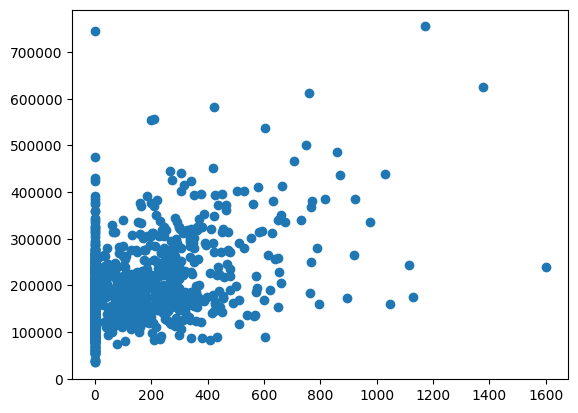

In [36]:
plt.scatter(x='MasVnrArea',y='SalePrice' ,data=train_data)

In [37]:
train_data.query('MasVnrArea > 1200 & SalePrice > 60000') #298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


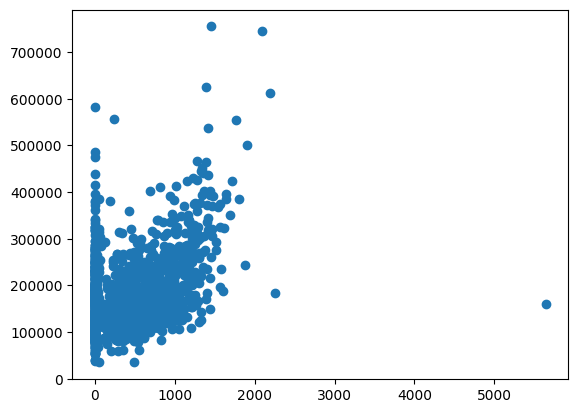

In [38]:
plt.scatter(x='BsmtFinSF1',y='SalePrice' ,data=train_data)#1299

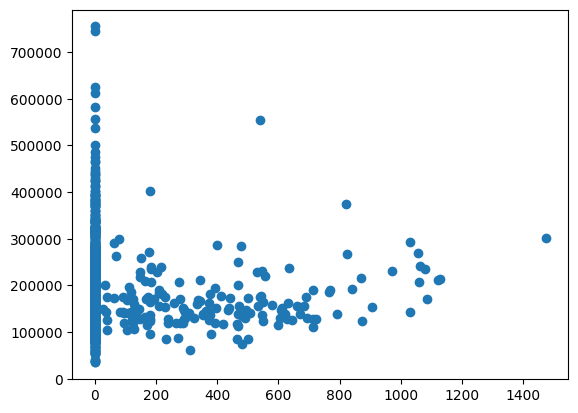

In [39]:
plt.scatter(x='BsmtFinSF2',y='SalePrice' ,data=train_data)#441

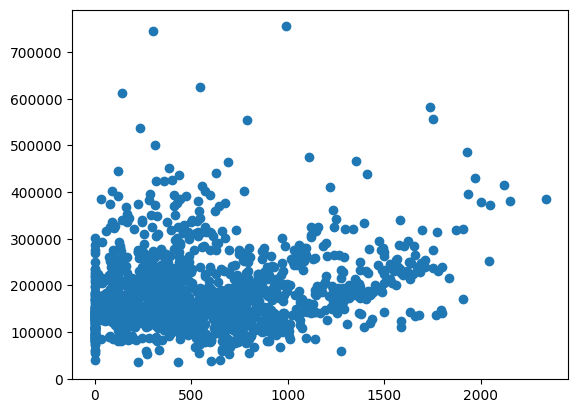

In [40]:
plt.scatter(x='BsmtUnfSF',y='SalePrice' ,data=train_data)

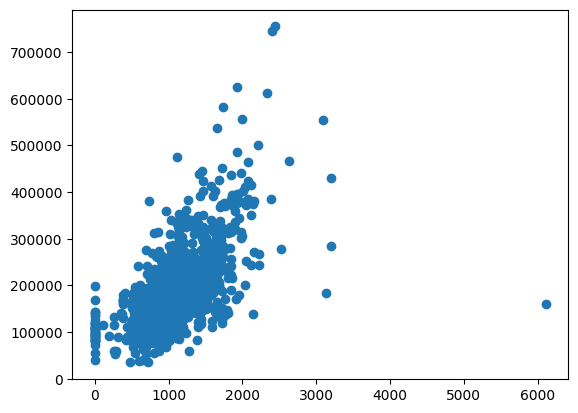

In [41]:
plt.scatter(x='TotalBsmtSF',y='SalePrice' ,data=train_data)#1299

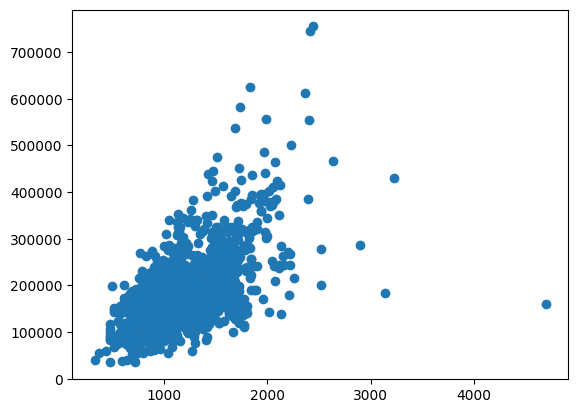

In [42]:
plt.scatter(x='1stFlrSF',y='SalePrice' ,data=train_data)#

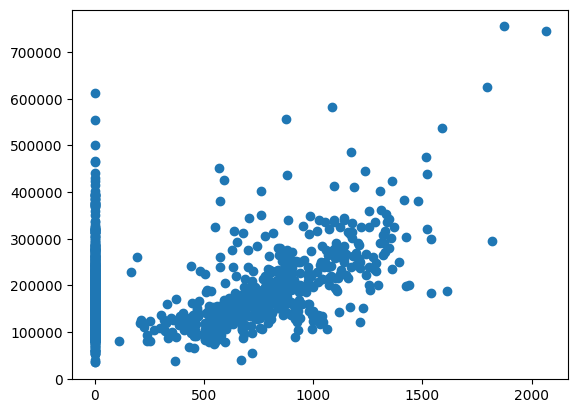

In [43]:
plt.scatter(x='2ndFlrSF',y='SalePrice' ,data=train_data)

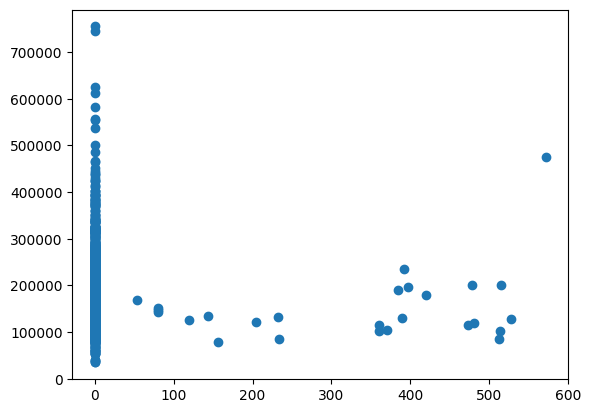

In [44]:
plt.scatter(x='LowQualFinSF',y='SalePrice' ,data=train_data)#186

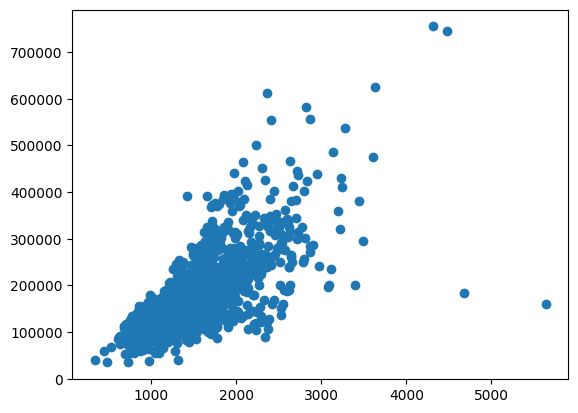

In [45]:
plt.scatter(x='GrLivArea',y='SalePrice' ,data=train_data)#524 #1299

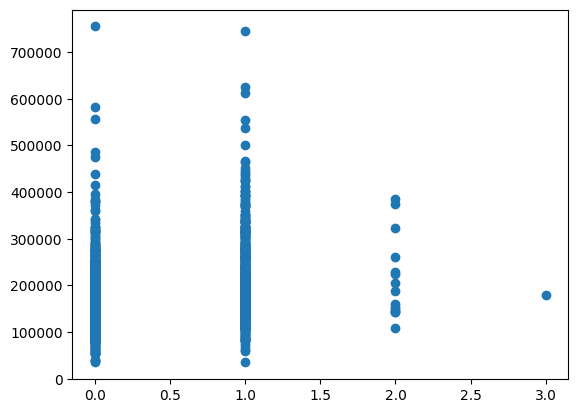

In [46]:
plt.scatter(x='BsmtFullBath',y='SalePrice' ,data=train_data)#739

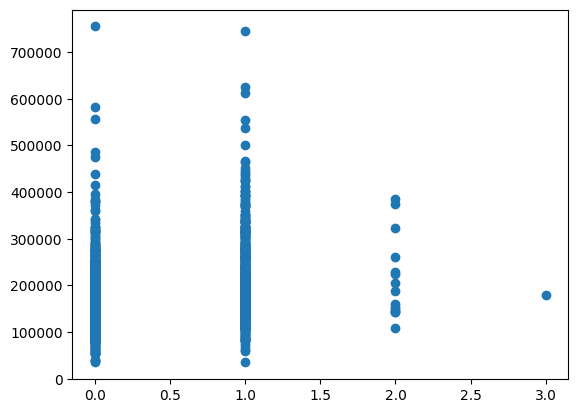

In [47]:
plt.scatter(x='BsmtFullBath',y='SalePrice' ,data=train_data)#598 #955

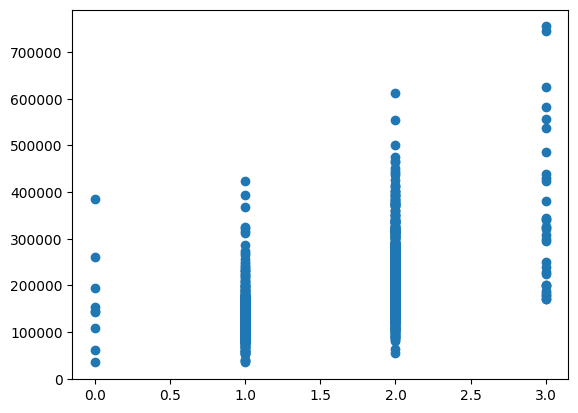

In [48]:
plt.scatter(x='FullBath',y='SalePrice' ,data=train_data)#

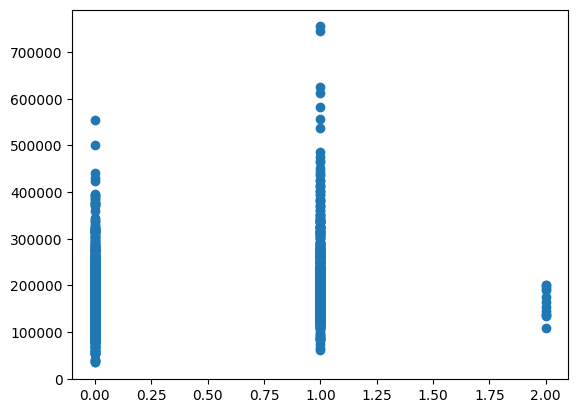

In [49]:
plt.scatter(x='HalfBath',y='SalePrice' ,data=train_data)#739

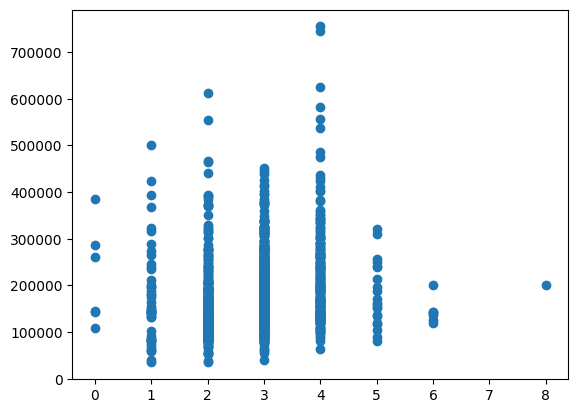

In [50]:
plt.scatter(x='BedroomAbvGr',y='SalePrice' ,data=train_data)#636

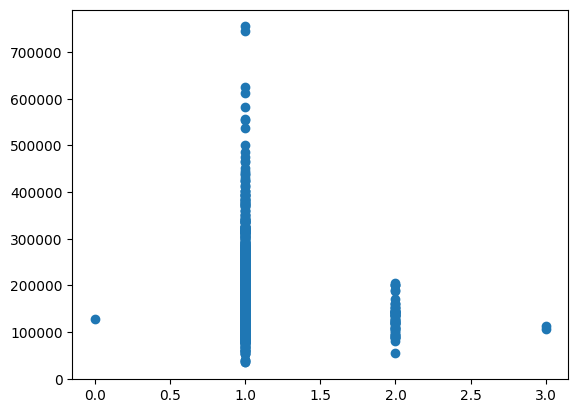

In [51]:
plt.scatter(x='KitchenAbvGr',y='SalePrice' ,data=train_data)#49,#810

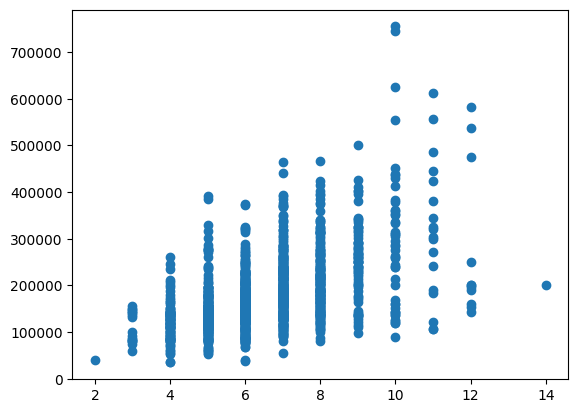

In [52]:
plt.scatter(x='TotRmsAbvGrd',y='SalePrice' ,data=train_data)#636

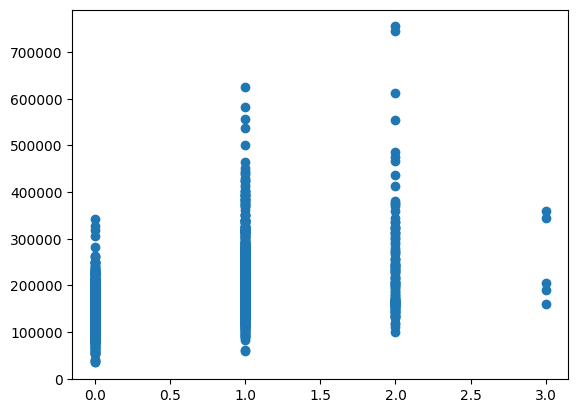

In [53]:
plt.scatter(x='Fireplaces',y='SalePrice' ,data=train_data)#

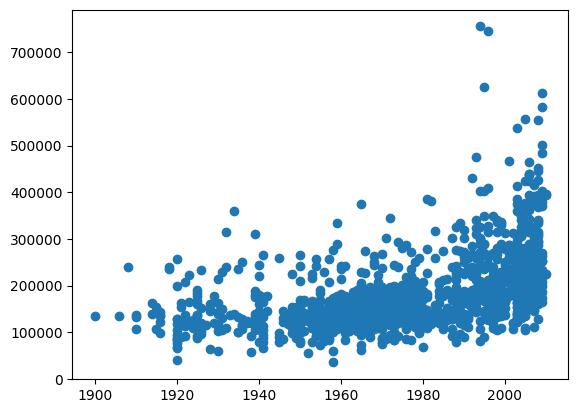

In [54]:
plt.scatter(x='GarageYrBlt',y='SalePrice' ,data=train_data)#739

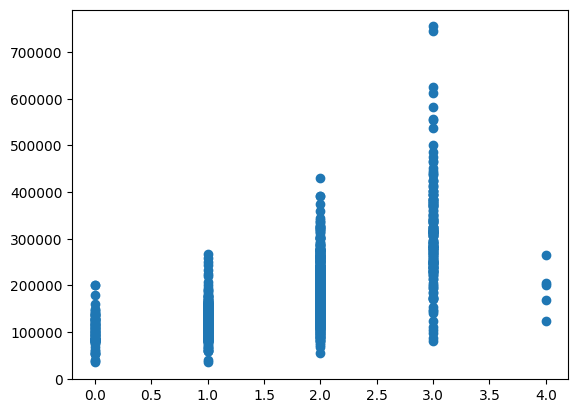

In [55]:
plt.scatter(x='GarageCars',y='SalePrice' ,data=train_data)#739

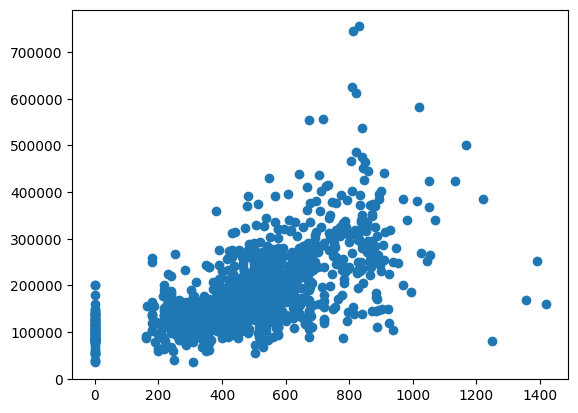

In [56]:
plt.scatter(x='GarageArea',y='SalePrice' ,data=train_data)#1062, 1191

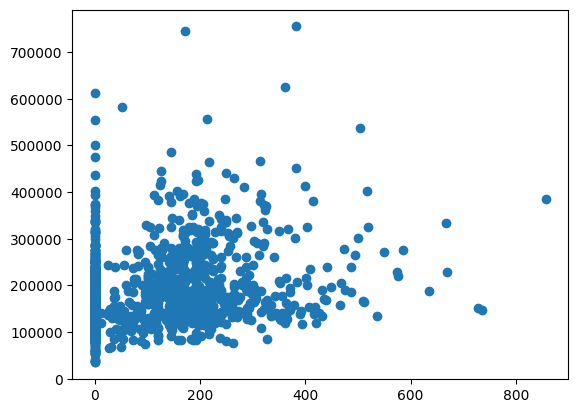

In [57]:
plt.scatter(x='WoodDeckSF',y='SalePrice' ,data=train_data)#

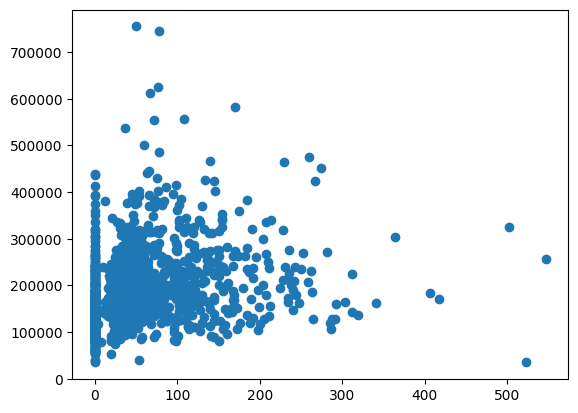

In [58]:
plt.scatter(x='OpenPorchSF',y='SalePrice' ,data=train_data)#496

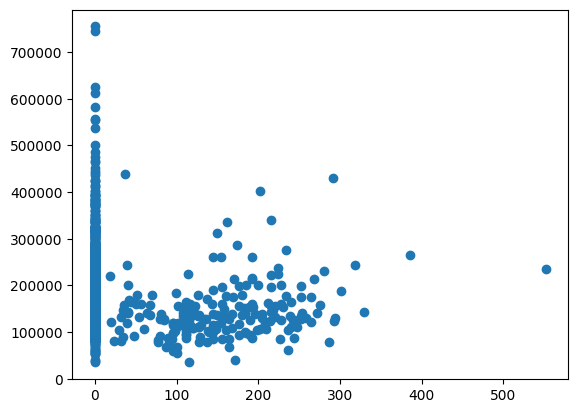

In [59]:
plt.scatter(x='EnclosedPorch',y='SalePrice' ,data=train_data)#198

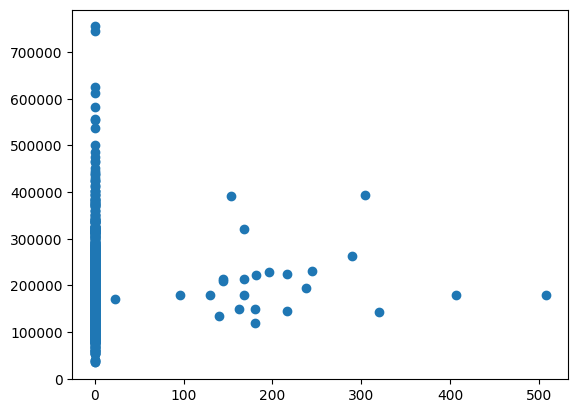

In [60]:
plt.scatter(x='3SsnPorch',y='SalePrice' ,data=train_data)

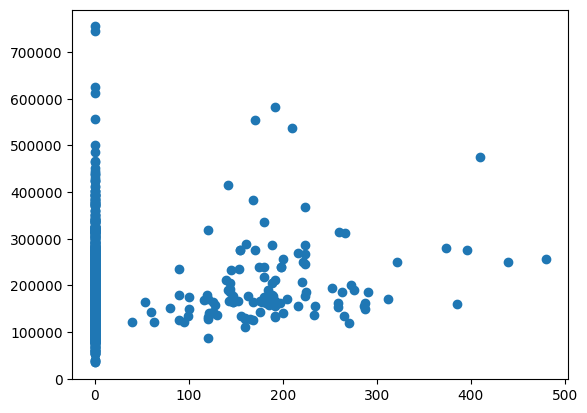

In [61]:
plt.scatter(x='ScreenPorch',y='SalePrice' ,data=train_data)

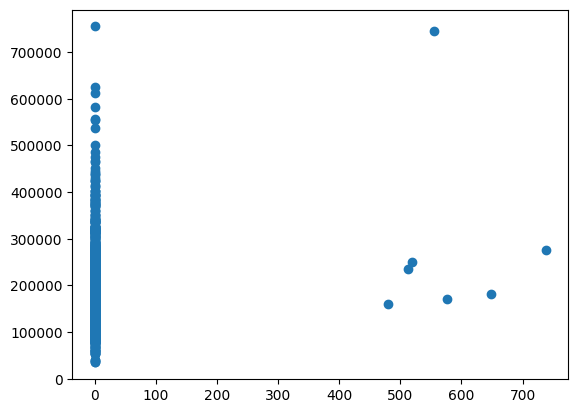

In [62]:
plt.scatter(x='PoolArea',y='SalePrice' ,data=train_data)

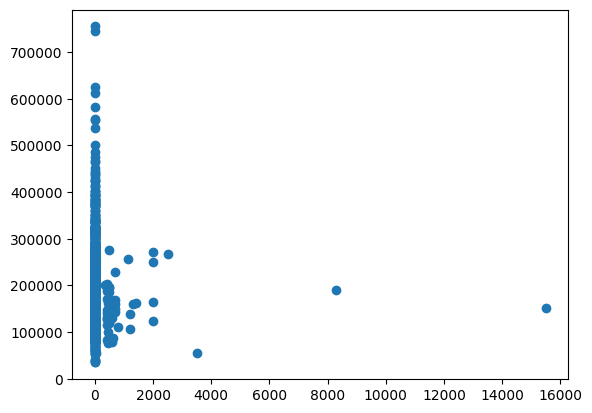

In [63]:
plt.scatter(x='MiscVal',y='SalePrice' ,data=train_data)

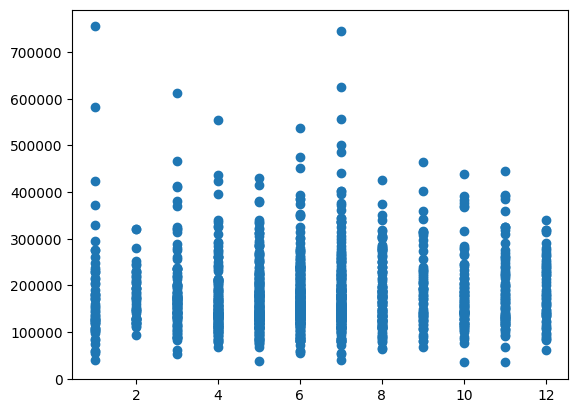

In [64]:
plt.scatter(x='MoSold',y='SalePrice' ,data=train_data)

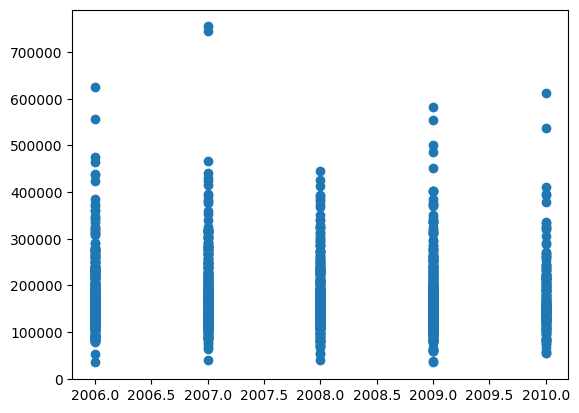

In [65]:
plt.scatter(x='YrSold',y='SalePrice' ,data=train_data)

In [66]:
values = [598, 955, 1299, 250 , 314, 336, 707, 379, 1183, 692, 186, 441, 524, 739, 955, 636, 1062, 1191, 496, 198]

In [67]:
train_data = train_data[train_data.Id.isin(values) == False]

In [68]:
pd.DataFrame(train_data.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1437
MiscFeature,1390
Alley,1351
Fence,1164
MasVnrType,863
FireplaceQu,685
LotFrontage,255
GarageYrBlt,77
GarageCond,77
GarageType,77


# Null Values Treatment

In [69]:
train_data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [70]:
train_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [71]:
train_data['Alley'].fillna('No', inplace=True)
test_data['Alley'].fillna('No', inplace=True)

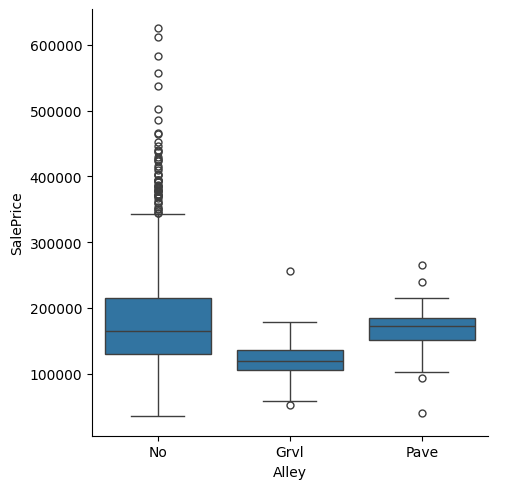

In [72]:
sns.catplot(data=train_data, x='Alley', y='SalePrice', kind='box')

In [73]:
train_data.query('Alley == "Parve"').count()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [74]:
train_data['Fence'].fillna('No', inplace=True)
test_data['Fence'].fillna('No', inplace=True)

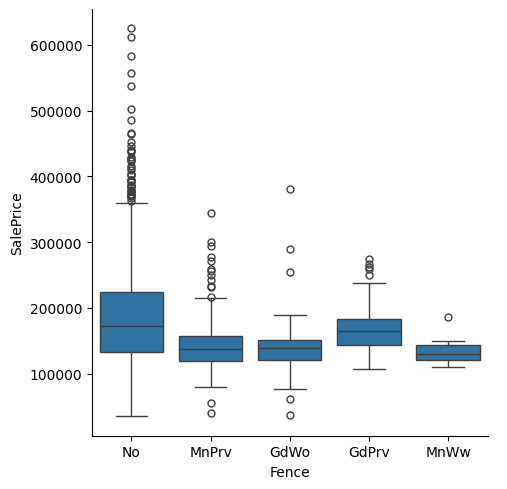

In [75]:
sns.catplot(data=train_data, x='Fence', y='SalePrice', kind='box')

In [76]:
train_data['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [77]:
train_data['MasVnrType'].fillna('No', inplace=True)
test_data['MasVnrType'].fillna('No', inplace=True)

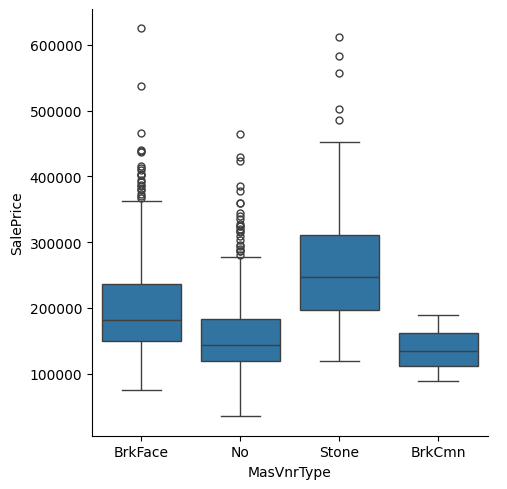

In [78]:
sns.catplot(data=train_data, x='MasVnrType', y='SalePrice', kind='box')

In [79]:
train_data['MasVnrArea'].fillna(0, inplace=True)
test_data['MasVnrArea'].fillna(0, inplace=True)

In [80]:
train_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [81]:
train_data['FireplaceQu'].fillna('No', inplace=True)
test_data['FireplaceQu'].fillna('No', inplace=True)

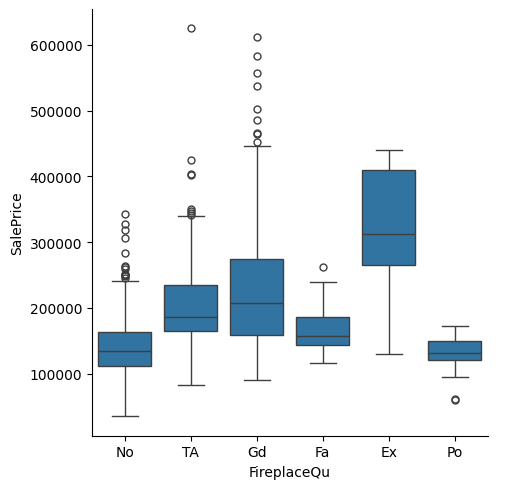

In [82]:
sns.catplot(data=train_data, x='FireplaceQu', y='SalePrice', kind='box')

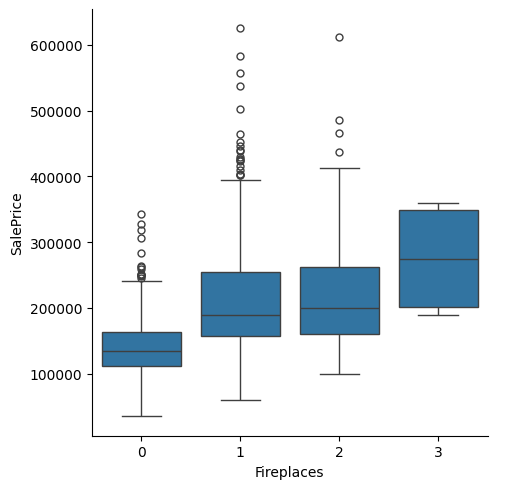

In [83]:
sns.catplot(data=train_data, x='Fireplaces', y='SalePrice', kind='box')

In [84]:
train_data['LotFrontage'].fillna(0, inplace=True)
test_data['LotFrontage'].fillna(0, inplace=True)

In [85]:
train_data['GarageYrBlt'].corr(train_data['YearBuilt'])

0.8289959170792558

In [86]:
train_data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [87]:
train_data['GarageCond'].fillna('No', inplace=True)
test_data['GarageCond'].fillna('No', inplace=True)

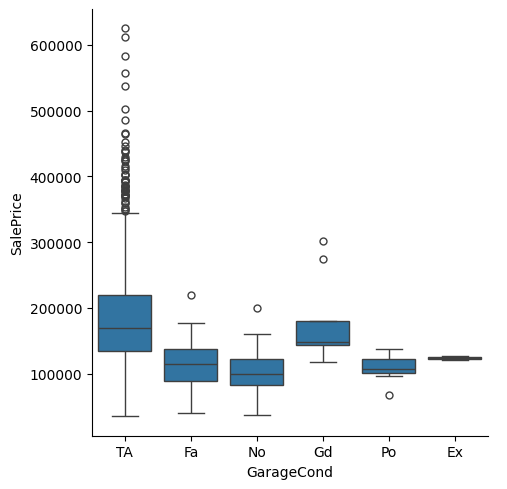

In [88]:
sns.catplot(data=train_data, x='GarageCond', y='SalePrice', kind='box')

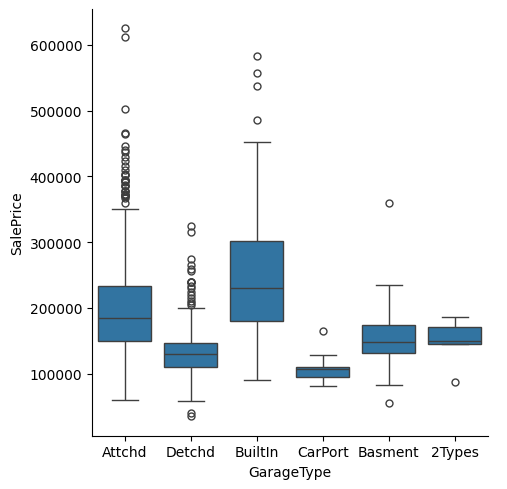

In [89]:
sns.catplot(data=train_data, x='GarageType', y='SalePrice', kind='box')

In [90]:
train_data['GarageType'].fillna('No', inplace=True)
test_data['GarageType'].fillna('No', inplace=True)

In [91]:
train_data['GarageFinish'].fillna('No', inplace=True)
test_data['GarageFinish'].fillna('No', inplace=True)

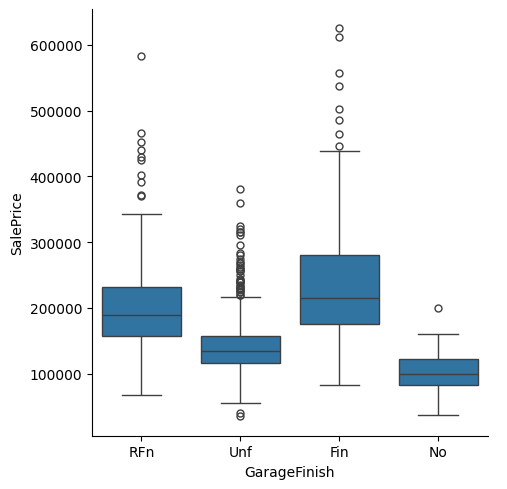

In [92]:
sns.catplot(data=train_data, x='GarageFinish', y='SalePrice', kind='box')

In [93]:
train_data['GarageQual'].fillna('No', inplace=True)
test_data['GarageQual'].fillna('No', inplace=True)

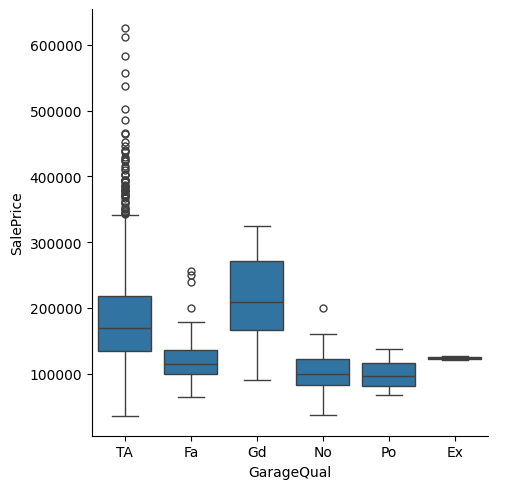

In [94]:
sns.catplot(data=train_data, x='GarageQual', y='SalePrice', kind='box')

In [95]:
train_data['BsmtFinType2'].fillna('Unf', inplace=True)
test_data['BsmtFinType2'].fillna('Unf', inplace=True)

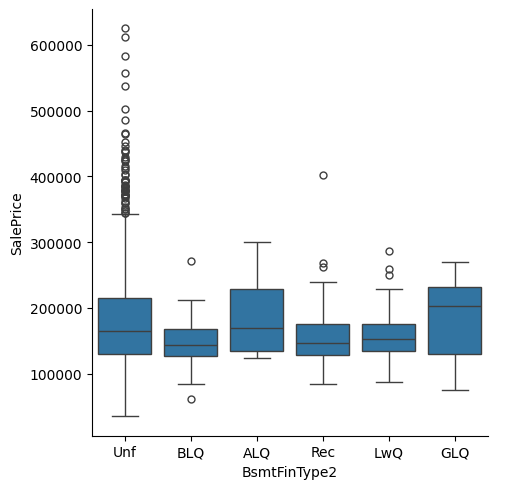

In [96]:
sns.catplot(data=train_data, x='BsmtFinType2', y='SalePrice', kind='box')

In [97]:
train_data['BsmtExposure'].fillna('No', inplace=True)
test_data['BsmtExposure'].fillna('No', inplace=True)

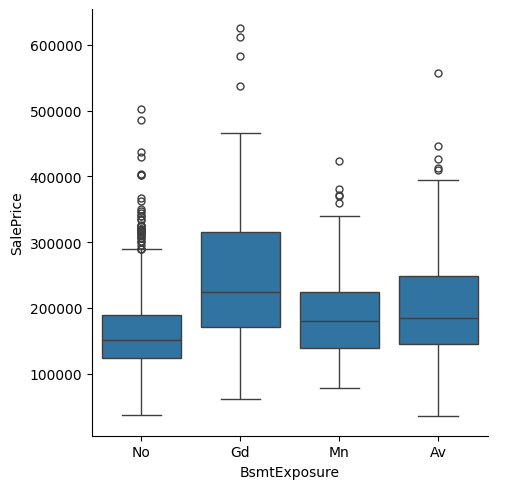

In [98]:
sns.catplot(data=train_data, x='BsmtExposure', y='SalePrice', kind='box')

In [99]:
train_data['BsmtQual'].fillna('No', inplace=True)
test_data['BsmtQual'].fillna('No', inplace=True)

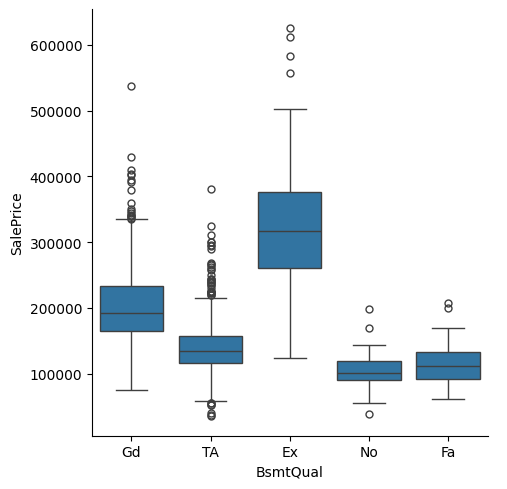

In [100]:
sns.catplot(data=train_data, x="BsmtQual", y="SalePrice", kind="box")

In [101]:
train_data['BsmtCond'].fillna('No', inplace=True)
test_data['BsmtCond'].fillna('No', inplace=True)

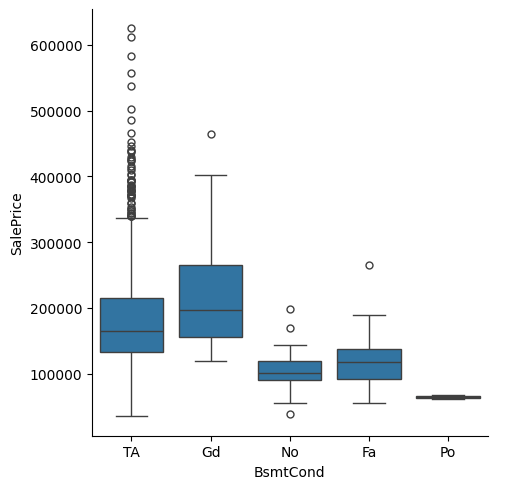

In [102]:
sns.catplot(data=train_data, x='BsmtCond', y='SalePrice', kind='box')

In [103]:
train_data['BsmtFinType1'].fillna('Unf', inplace=True)
test_data['BsmtFinType1'].fillna('Unf', inplace=True)

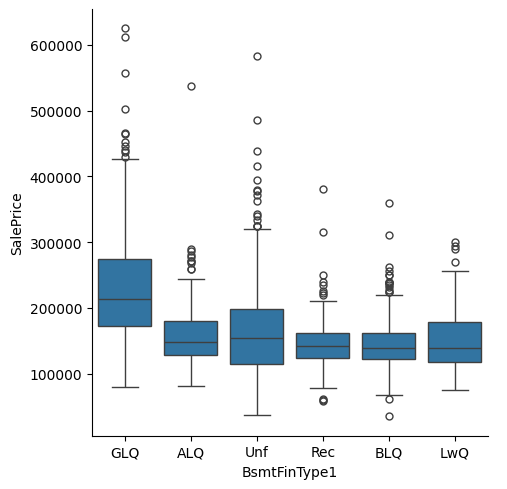

In [104]:
sns.catplot(data=train_data, x='BsmtFinType1', y='SalePrice', kind='box')

In [105]:
train_data['MasVnrArea'].fillna(0, inplace=True)
test_data['MasVnrArea'].fillna(0, inplace=True)

In [106]:
train_data['Electrical'].fillna('SBrkr', inplace=True)
test_data['Electrical'].fillna('SBrkr', inplace=True)

In [107]:
train_data = train_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

In [108]:
test_data = test_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','GarageYrBlt','GarageCond','BsmtFinType2'])

# Feature Engineering

In [109]:
train_data['housage'] = train_data['YrSold'] - train_data['YearBuilt']
test_data['housage'] = test_data['YrSold'] - test_data['YearBuilt']

In [110]:
train_data['houseremodelage'] = train_data['YrSold'] - train_data['YearRemodAdd']
test_data['houseremodelage'] = test_data['YrSold'] - test_data['YearRemodAdd']

In [111]:
train_data['totalsf'] = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['BsmtFinSF1']
test_data['totalsf'] = test_data['1stFlrSF'] + test_data['2ndFlrSF'] + train_data['BsmtFinSF1']

In [112]:
train_data['totalarea'] = train_data['GrLivArea'] + train_data['TotalBsmtSF']
test_data['totalarea'] = test_data['GrLivArea'] + test_data['TotalBsmtSF']

In [113]:
train_data['totalbaths'] = train_data['BsmtFullBath'] + train_data['FullBath'] + 0.5 * (train_data['BsmtHalfBath'] + train_data['HalfBath'])
test_data['totalbaths'] = test_data['BsmtFullBath'] + test_data['FullBath'] + 0.5 * (test_data['BsmtHalfBath'] + test_data['HalfBath'])

In [114]:
train_data['totalporchsf'] = train_data['OpenPorchSF'] + train_data['3SsnPorch'] + train_data['EnclosedPorch'] + train_data['ScreenPorch']
test_data['totalporchsf'] = test_data['OpenPorchSF'] + test_data['3SsnPorch'] +  test_data['EnclosedPorch'] + test_data['ScreenPorch']

In [115]:
test_df = test_data.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

In [116]:
test_df = test_data.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

<Axes: >

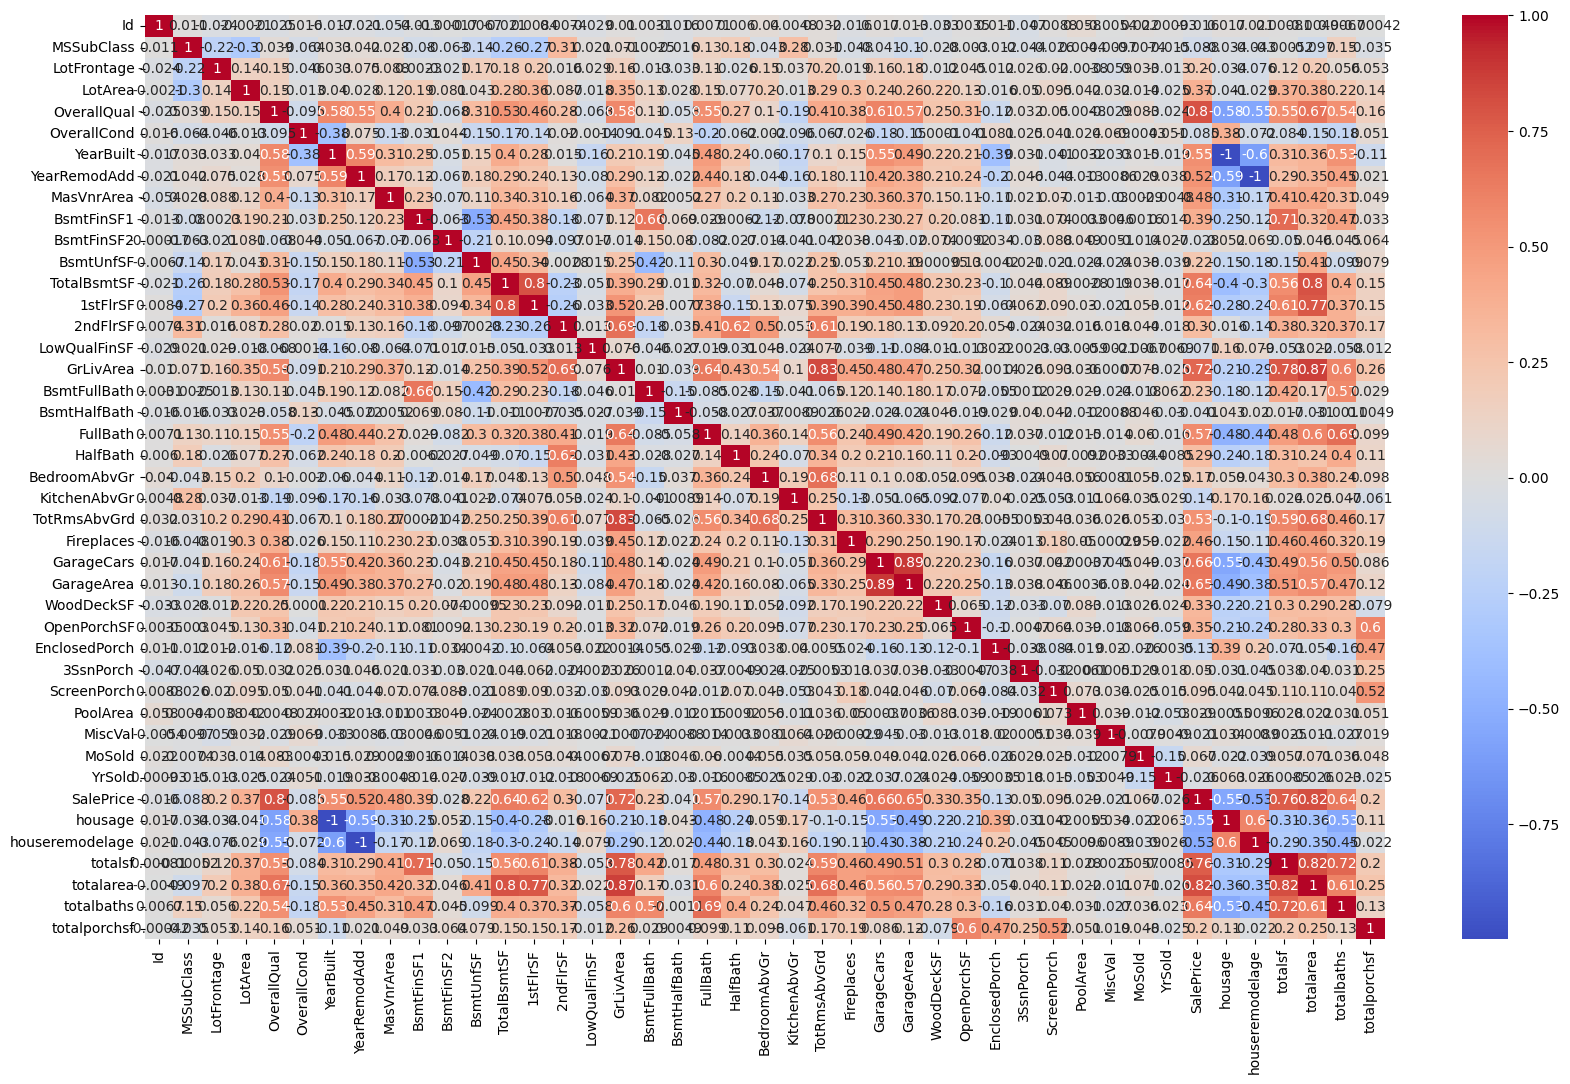

In [117]:
correlation_matrix = train_data.corr(numeric_only = True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Drop GarageArea and GarageCars

In [118]:
train_data = train_data.drop(columns=['GarageArea'])
test_data = test_data.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

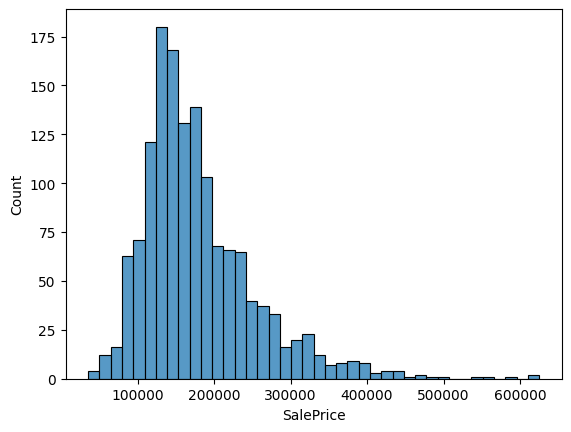

In [119]:
sns.histplot(
    train_data,
    x=train_data['SalePrice']
)

In [120]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

In [121]:
train_data.dtypes[train_data.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [122]:
train_data.dtypes[train_data.dtypes !='object']

Id                   int64
MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
YearBuilt            int64
YearRemodAdd         int64
MasVnrArea         float64
BsmtFinSF1           int64
BsmtFinSF2           int64
BsmtUnfSF            int64
TotalBsmtSF          int64
1stFlrSF             int64
2ndFlrSF             int64
LowQualFinSF         int64
GrLivArea            int64
BsmtFullBath         int64
BsmtHalfBath         int64
FullBath             int64
HalfBath             int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
WoodDeckSF           int64
OpenPorchSF          int64
EnclosedPorch        int64
3SsnPorch            int64
ScreenPorch          int64
PoolArea             int64
MiscVal              int64
MoSold               int64
YrSold               int64
SalePrice          float64
housage              int64
h

In [123]:
num_cols = train_data.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('SalePrice')

In [124]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [125]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [126]:
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [127]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [128]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [129]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [130]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [131]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough',
    n_jobs=-1)

In [132]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [133]:
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

In [134]:
X = pd.DataFrame(X)
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,housage,houseremodelage,totalsf,totalarea,totalbaths,totalporchsf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,5,5,2416,2566,3.5,61
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,31,31,2240,2524,2.5,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,7,6,2272,2706,3.5,42
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,91,36,1933,2473,2.0,307
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,8,8,2853,3343,3.5,84


In [135]:
X_preprocessed = pipeline.fit_transform(X)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

# Model Building

In [137]:
model = LinearRegression()

In [138]:
model.fit(X_train, y_train)


LinearRegression()

In [139]:
y_pred_lr = model.predict(X_test)

In [140]:
RFR = RandomForestRegressor(random_state=13)


In [141]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [146]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
rfr_cv.fit(X_train, y_train)

In [ ]:
np.sqrt(-1 * rfr_cv.best_score_)

In [ ]:
rfr_cv.best_params_


In [ ]:
XGB = XGBRegressor(random_state=13)


In [ ]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [ ]:
import lightgbm as lgb
lgbm_regressor = lgb.LGBMRegressor()

In [ ]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [ ]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)


In [ ]:
lgbm_cv.fit(X_train, y_train)

In [ ]:
np.sqrt(-1 * lgbm_cv.best_score_)

In [ ]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [ ]:
param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [ ]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
cat_cv.fit(X_train, y_train)
GridSearchCV
estimator: CatBoostRegressor
CatBoostRegressor

In [ ]:
np.sqrt(-1 * cat_cv.best_score_)

In [ ]:
vr = VotingRegressor([('gbr', GBR_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [ ]:
vr.fit(X_train, y_train)

In [ ]:
y_pred_vr = vr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_vr, squared=False)

In [ ]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [ ]:
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)

In [ ]:
stackreg.fit(X_train, y_train)

In [ ]:
y_pred_stack = stackreg.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_stack, squared=False)

In [ ]:
df_test_preprocess = pipeline.transform(test_df)

In [ ]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index=False)